# scaling the data 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(file_path, target_column):
    """
    Loads data from a CSV, splits it into train/validation/test sets,
    and applies StandardScaler to the features.

    Args:
        file_path (str): The path to the CSV file.
        target_column (str): The name of the column to be used as the target/label.

    Returns:
        dict: A dictionary containing the processed data splits
              (X_train, y_train, X_val, y_val, X_test, y_test)
              and the fitted scaler object.
    """
    # 1. Load the dataset from the CSV file
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None

    print("--- Data loaded successfully. ---")
    print(f"Original dataset shape: {df.shape}")

    # 2. Separate features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # 3. First split: 70% for training, 30% for temp (validation + test)
    # The random_state ensures that the split is the same every time you run it.
    # 💡 FIX: Removed the 'stratify' parameter here.
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 4. Second split: Split the 30% temp set into 15% validation and 15% test
    # 💡 FIX: Removed the 'stratify' parameter here as well.
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    print("\n--- Data split into training, validation, and test sets. ---")
    print(f"Training set:   {X_train.shape[0]} samples (70%)")
    print(f"Validation set: {X_val.shape[0]} samples (15%)")
    print(f"Test set:       {X_test.shape[0]} samples (15%)")

    # 5. Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    print("\n--- Feature scaling applied successfully. ---")

    # 6. Store all results in a single dictionary
    preprocessed_data = {
        'X_train': X_train_scaled,
        'y_train': y_train,
        'X_val': X_val_scaled,
        'y_val': y_val,
        'X_test': X_test_scaled,
        'y_test': y_test,
        'scaler': scaler
    }
    
    print("\nPreprocessing complete. Data is ready in the returned dictionary.")
    
    return preprocessed_data

# --- EXAMPLE USAGE ---

# 1. Specify your file path and the name of your target column
csv_file = "../../data analyzing/Concrete_Data_Yeh.csv"
target = 'csMPa'

# 2. Call the function to get the processed data
processed_results = preprocess_data(csv_file, target)

# 3. Now you can easily access all the datasets from the 'processed_results' dictionary
if processed_results:
    print("\n--- Accessing the processed data ---")
    print("\nScaled training features (first 5 rows):")
    print(processed_results['X_train'].head())
    
    print("\nTraining labels (first 5 rows):")
    print(processed_results['y_train'].head())

--- Data loaded successfully. ---
Original dataset shape: (1030, 9)

--- Data split into training, validation, and test sets. ---
Training set:   721 samples (70%)
Validation set: 154 samples (15%)
Test set:       155 samples (15%)

--- Feature scaling applied successfully. ---

Preprocessing complete. Data is ready in the returned dictionary.

--- Accessing the processed data ---

Scaled training features (first 5 rows):
     cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0 -0.828484 -0.855296  0.761701 -0.766488          0.227273         0.415545   
1  0.374823 -0.855296 -0.816913  0.103748         -1.013995         1.136979   
2  0.317566  1.568935 -0.816913 -1.234713          1.352690        -1.551191   
3  0.688809 -0.638541  1.397859 -1.315115          0.789982        -0.405309   
4 -1.130465  1.312252  1.507813 -0.132729          2.130551        -1.730912   

   fineaggregate       age  
0       1.676803 -0.292980  
1       0.141904 -0.633845  
2     

# craeting our firest Neraul network model 
--- Model Summary ---
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 dense (Dense)               (None, 64)                576

 dense_1 (Dense)             (None, 64)                4160

 dense_2 (Dense)             (None, 1)                 65

=================================================================
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




--- Starting Model Training with Dropout and LR Scheduler ---
Epoch 1/200


23/23 [==============================] - 5s 34ms/step - loss: 1513.4587 - mean_absolute_error: 35.0843 - val_loss: 1262.7872 - val_mean_absolute_error: 31.2117 - lr: 0.0010
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 1205.1566 - mean_absolute_error: 30.3211 - val_loss: 788.6049 - val_mean_absolute_error: 23.0090 - lr: 0.0010
Epoch 3/200
23/23 [==============================] - 0s 13ms/step - loss: 594.1617 - mean_absolute_error: 19.5351 - val_loss: 295.7217 - val_mean_absolute_error: 13.5959 - lr: 0.0010
Epoch 4/200
23/23 [==============================] - 0s 21ms/step - loss: 367.4915 - mean_absolute_error: 15.1475 - val_loss: 247.6332 - val_mean_absolute_error: 12.6202 - lr: 0.0010
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 314.1493 - mean_absolute_error: 14.0544 - val_loss: 228.8337 - val_mean_absolute_error: 12.1014 - lr: 0.0010
Epoch 6/200
23/23

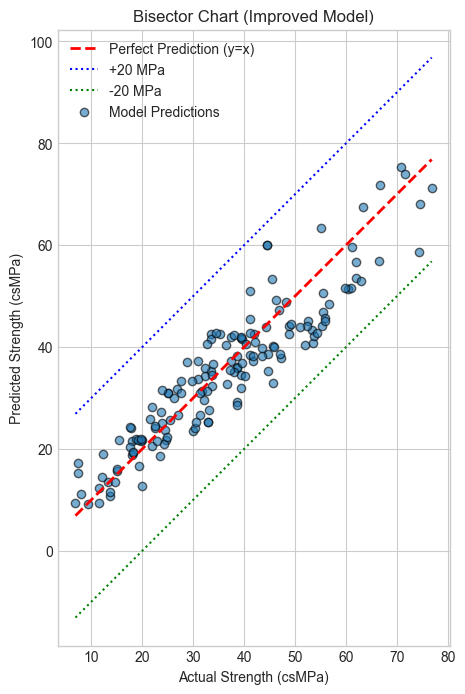

Saved 'loss_curve_improved.svg'


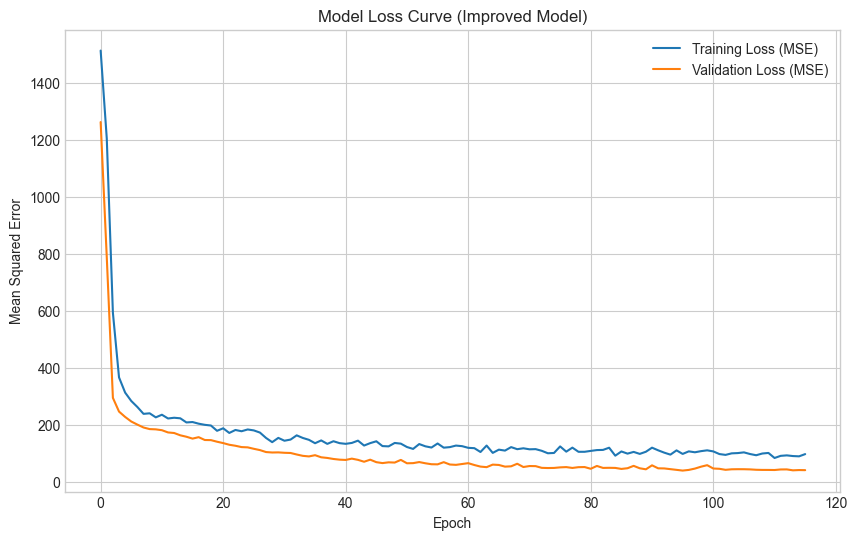

Saved 'residuals_plot_improved.svg'


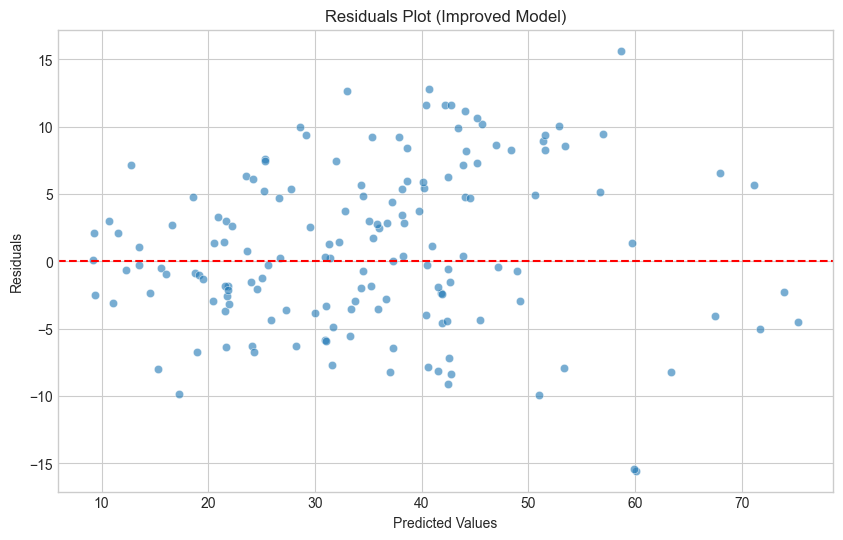


--- Saving improved model, scaler, and detailed results ---
Detailed results saved to 'model_summary_and_metrics_improved.csv'


C:\Users\acking\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# --- Preprocessing function remains the same ---
def preprocess_data(file_path, target_column):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    return {
        'X_train': X_train_scaled, 'y_train': y_train,
        'X_val': X_val_scaled, 'y_val': y_val,
        'X_test': X_test_scaled, 'y_test': y_test,
        'scaler': scaler
    }

# --- Load and preprocess the data ---
csv_file = "../../data analyzing/Concrete_Data_Yeh.csv"
target = 'csMPa'
processed_results = preprocess_data(csv_file, target)

if processed_results:
    # --- 1. Define the IMPROVED Neural Network Architecture ---
    model = tf.keras.Sequential([
        # Input Layer
        tf.keras.layers.Dense(128, activation='relu', input_shape=[len(processed_results['X_train'].columns)]),
        tf.keras.layers.Dropout(0.3), # Dropout layer for regularization

        # Hidden Layer 1
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3), # Dropout layer for regularization

        # Hidden Layer 2
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3), # Dropout layer for regularization
        
        # Output Layer
        tf.keras.layers.Dense(1)
    ])

    # --- 2. Compile the Model ---
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    
    # --- 3. Train the Model with IMPROVED Callbacks ---
    print("\n--- Starting Model Training with Dropout and LR Scheduler ---")
    
    # Callback 1: Stop training when validation loss stops improving
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    
    # Callback 2: Reduce learning rate when validation loss plateaus
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)

    history = model.fit(
        processed_results['X_train'], processed_results['y_train'],
        epochs=200, # Increased epochs to give scheduler more time to work
        validation_data=(processed_results['X_val'], processed_results['y_val']),
        verbose=1,
        callbacks=[early_stopping, reduce_lr] # Pass both callbacks
    )

    # --- 4. Evaluate on the Test Set ---
    test_loss_mse, test_mae = model.evaluate(processed_results['X_test'], processed_results['y_test'], verbose=0)
    y_pred = model.predict(processed_results['X_test']).flatten()
    y_true = processed_results['y_test']

    # --- 5. Calculate Additional Dimensionless Error Metrics ---
    r_squared = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # --- 6. Generate and Save Diagnostic Charts ---
    print("\n--- Generating and saving diagnostic charts ---")
    # (The plotting code remains the same, but will now show results from the improved model)
    plt.style.use('seaborn-v0_8-whitegrid')

    # Chart 1: Bisector Chart
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    perfect_line_coords = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 100)
    ax1.plot(perfect_line_coords, perfect_line_coords, color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')
    ax1.plot(perfect_line_coords, perfect_line_coords + 20, color='blue', linestyle=':', linewidth=1.5, label='+20 MPa')
    ax1.plot(perfect_line_coords, perfect_line_coords - 20, color='green', linestyle=':', linewidth=1.5, label='-20 MPa')
    ax1.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', label='Model Predictions')
    ax1.set_xlabel('Actual Strength (csMPa)'), ax1.set_ylabel('Predicted Strength (csMPa)')
    ax1.set_title('Bisector Chart (Improved Model)'), ax1.legend(), ax1.grid(True), ax1.set_aspect('equal', adjustable='box')
    plt.savefig('bisector_chart_improved.svg', format='svg')
    print("Saved 'bisector_chart_improved.svg'")
    plt.show()

    # Chart 2: Loss Curve
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(history.history['loss'], label='Training Loss (MSE)')
    ax2.plot(history.history['val_loss'], label='Validation Loss (MSE)')
    ax2.set_title('Model Loss Curve (Improved Model)'), ax2.set_xlabel('Epoch'), ax2.set_ylabel('Mean Squared Error')
    ax2.legend()
    plt.savefig('loss_curve_improved.svg', format='svg')
    print("Saved 'loss_curve_improved.svg'")
    plt.show()

    # Chart 3: Residuals Plot
    residuals = y_true - y_pred
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax3)
    ax3.axhline(y=0, color='red', linestyle='--')
    ax3.set_title('Residuals Plot (Improved Model)'), ax3.set_xlabel('Predicted Values'), ax3.set_ylabel('Residuals')
    plt.savefig('residuals_plot_improved.svg', format='svg')
    print("Saved 'residuals_plot_improved.svg'")
    plt.show()

    # --- 7. Save Artifacts and Detailed Results CSV ---
    print("\n--- Saving improved model, scaler, and detailed results ---")
    model.save('concrete_strength_model_improved.h5')
    joblib.dump(processed_results['scaler'], 'scaler.gz') # Scaler is the same, can be overwritten

    # (Saving logic remains the same)
    model_config_str = " -> ".join([f"{layer.__class__.__name__}({layer.get_config().get('units', '')})" for layer in model.layers])
    results_summary = {
        'Model_Description': model_config_str, 'Total_Parameters': model.count_params(),
        'Optimizer': optimizer.__class__.__name__, 'Learning_Rate_Initial': 0.001,
        'Callbacks': 'EarlyStopping, ReduceLROnPlateau', 'Epochs_Trained': len(history.history['loss']),
        'MSE_test_set': test_loss_mse, 'MAE_test_set': test_mae,
        'R_squared': r_squared, 'MAPE_%': mape
    }
    df_results = pd.DataFrame([results_summary])
    df_results.to_csv('model_summary_and_metrics_improved.csv', index=False)
    print("Detailed results saved to 'model_summary_and_metrics_improved.csv'")

# HOw to load and use models 

In [ ]:
import tensorflow as tf
import joblib
import numpy as np

# --- Load the saved model and scaler ---
loaded_model = tf.keras.models.load_model('concrete_strength_model.h5')
loaded_scaler = joblib.load('scaler.gz')

# --- Imagine you have new data for one sample ---
# IMPORTANT: The new data must have the same features in the same order as the training data.
# (cement, slag, flyash, water, superplasticizer, coarseagg, fineagg, age)
new_concrete_sample = np.array([[540, 0, 0, 162, 2.5, 1040, 676, 28]])

# --- Preprocess the new data using the LOADED scaler ---
new_sample_scaled = loaded_scaler.transform(new_concrete_sample)

# --- Make a prediction ---
prediction = loaded_model.predict(new_sample_scaled)

print(f"\n--- Prediction on New Data ---")
print(f"Predicted Concrete Strength: {prediction[0][0]:.2f} csMPa")